In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',104)
import seaborn as sns
import pandas_profiling

%matplotlib inline

In [2]:
store_df = pd.read_csv('0826export.csv')
store_df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,253.00,61,1,5,4,0,1,6,0,73,5,5,60,0.136601,0.0,0.088670,15.726712,177.362361,4.433040,-0.350361,2.816667,212.834

In [4]:
master_df = pd.read_excel('store_master.xlsx')

In [5]:
master_df.head()

,DIV,STORE,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND
0,7,1504,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2
1,7,1505,29-MAY-84,NaN,CA,92626,COSTA MESA,1876,Mall,S,5
2,7,1508,29-MAY-84,NaN,TX,77056,HOUSTON,2102,Mall,S,5
3,7,1514,29-MAY-84,NaN,MI,48313,STERLING HEIGHTS,1000,Mall,S,1
4,7,1521,29-MAY-84,NaN,FL,33431,BOCA RATON,2302,Mall,S,3


In [6]:
master_df.CLASS.value_counts()

Outlet       70
Mall         64
Airport      20
Street        8
Downtown      5
Open Air      5
Lifestyle     3
Name: CLASS, dtype: int64

In [13]:
master_df.groupby(['CLOSE_DATE','STORE']).agg('count')

DIV  OPEN_DATE  STORE_STATE  STORE_ZIP  STORE_CITY  \
CLOSE_DATE STORE                                                       
01-APR-19  1711     1          1            1          1           1   
01-JUN-16  2065     1          1            1          1           1   
17-SEP-17  1820     1          1            1          1           1   
26-APR-16  1830     1          1            1          1           1   
27-MAR-19  1652     1          1            1          1           1   
29-MAY-19  1803     1          1            1          1           1   
30-JAN-19  1670     1          1            1          1           1   
           1832     1          1            1          1           1   
30-MAR-19  1717     1          1            1          1           1   
31-DEC-17  1643     1          1            1          1           1   

                  GROSS_FEET  CLASS  RPTCODE  VOLUME_BAND  
CLOSE_DATE STORE                                           
01-APR-19  1711            1      1        1            1  
01-JUN-16  2065            1      1        1            1  
17-SEP-17  1820            1      1        1            1  
26-APR-16  1830            1      1        1            1  
27-MAR-19  1652            1      1        1            1  
29-MAY-19  1803            1      1        1            1  
30-JAN-19  1670            1      1        1            1  
           1832            1      1        1            1  
30-MAR-19  1717            1      1        1            1  
31-DEC-17  1643            1      1        1            1

In [14]:
##merge store and master to get the locations of store
st_df =store_df.merge(master_df, on='STORE', how='inner')

In [15]:
st_df.head()

,DIV_x,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,...,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,DIV_y,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,...,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,...,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,...,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,...,0,73,5,5,60,0.136601,0.0,0.088670,15.726712,177.362361,4.433040,-0.350361,2.816667,212.834833,0.511628,0.177998,0.254438,0.745562,0.013234,144.2

In [78]:
st_df.STORE_CITY.value_counts()

HOUSTON        572
PITTSBURGH     528
ATLANTA        522
ORLANDO        521
BALTIMORE      519
              ... 
LOS ANGELES     36
TULALIP         16
BURLINGTON      15
PORTLAND        10
BRIDGEWATER      6
Name: STORE_CITY, Length: 146, dtype: int64

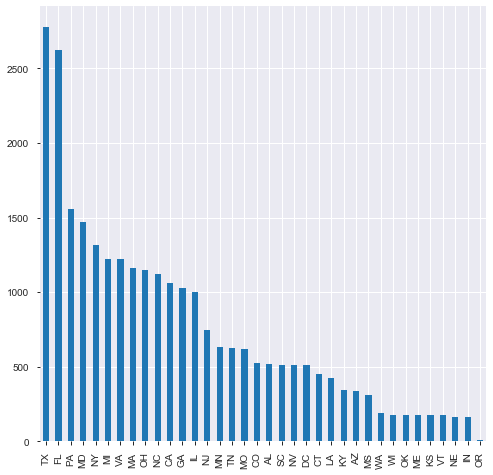

In [82]:
st_df.STORE_STATE.value_counts().plot(kind='bar',figsize=(8,8))

In [32]:
sales = st_df.groupby('CLASS')

In [33]:
new_st = sales['SHOES_VALUE','ACCESSORY_VALUE','ACCESSORY_COATS_VALUE','ACCESSORY_SHIRT_SWEATER_VALUE']

In [34]:
agg = new_st.agg(['sum'])

In [35]:
agg

,SHOES_VALUE,ACCESSORY_VALUE,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_VALUE
,sum,sum,sum,sum
CLASS,,,,
Airport,3.974775e+07,53047322.10,10707819.72,22958107.03
Downtown,7.983121e+06,4071973.66,758512.73,1649145.11
Lifestyle,3.674038e+06,2080244.57,307237.94,984589.84
Mall,1.245364e+08,67664628.83,12645668.47,30040303.55
Open Air,5.647192e+06,2813994.70,452913.32,1166064.13
Outlet,1.300294e+08,61795711.39,10593461.09,32289087.58
Street,2.066419e+07,10748859.03,2699503.31,3546267.89


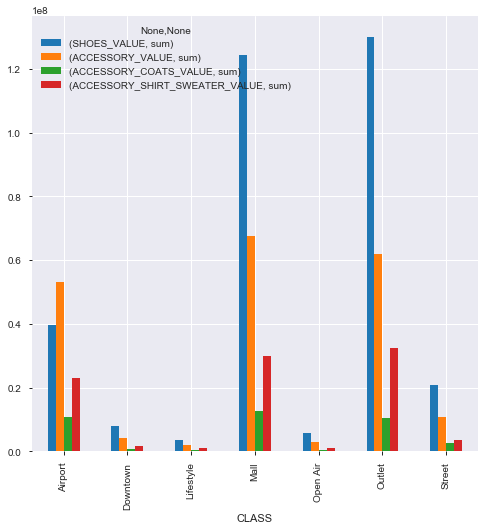

In [36]:
agg.plot(kind='bar',figsize=(8,8))

In [83]:
location = st_df.groupby('STORE_STATE')

In [84]:
new_loc = location['COMP_PCT','SHOES_VALUE','ACCESSORY_VALUE','ACCESSORY_COATS_VALUE','ACCESSORY_SHIRT_SWEATER_VALUE']

In [96]:
new=new_loc.agg(['sum'])


In [97]:
new

,COMP_PCT,SHOES_VALUE,ACCESSORY_VALUE,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_VALUE
,sum,sum,sum,sum,sum
STORE_STATE,,,,,
AL,-2.051573,4737903.55,1483824.02,236894.38,603273.47
AZ,38.021609,3373866.39,2123681.78,331710.25,1150056.24
CA,16.808908,15363476.92,9631716.96,2594369.71,3678090.99
CO,9.621973,7180765.83,6012017.00,1113509.41,3054921.51
CT,-0.037279,5548441.54,2611713.22,450928.26,1088454.58
DC,-15.396463,3495494.38,2449095.97,426099.32,969521.71
FL,188.288318,34058460.30,21874210.74,3811266.56,10430256.46
GA,47.768543,14918928.96,8710179.75,1510274.91,4083198.53


In [100]:
strak = st_df[['STORE','FISCAL_YEAR','FISCAL_MONTH','COMP_PCT','STRAK_TRAFFIC','STRAK_HRS','STRAK_CONVERSION_PCT','STRAK_SLS_PER_SHOPPER','STRAK_AVG_TRANS_SIZE','STRAK_SHOPPER_TO_ASSOC_RATIO','STRAK_COMP_TRAFFIC_DELTA','STORE_STATE','STORE_CITY']]

In [101]:
strak.head()

,STORE,FISCAL_YEAR,FISCAL_MONTH,COMP_PCT,STRAK_TRAFFIC,STRAK_HRS,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,STORE_STATE,STORE_CITY
0,1504,2017,1,0.034622,1168,186.88,0.097603,18.838339,193.010351,6.250000,-0.062981,NV,LAS VEGAS
1,1504,2017,1,-0.255050,891,180.31,0.105499,19.640123,186.163298,4.941490,-0.360549,NV,LAS VEGAS
2,1504,2017,1,-0.327715,930,182.23,0.084946,16.133978,189.931646,5.103441,-0.412661,NV,LAS VEGAS
3,1504,2017,1,-0.261691,812,183.17,0.088670,15.726712,177.362361,4.433040,-0.350361,NV,LAS VEGAS
4,1504,2017,2,-0.188700,1012,179.35,0.112648,19.684298,174.741316,5.642598,-0.301348,NV,LAS VEGAS


In [129]:
strak['STRAK_SHOPPER_TO_ASSOC_RATIO_PCT']=(100 * strak['STRAK_SHOPPER_TO_ASSOC_RATIO'] /strak['STRAK_SHOPPER_TO_ASSOC_RATIO'] .sum())

/Users/hanataduraiz/.local/share/virtualenvs/geospatial_startup-Ym8MJIYJ/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
strak.head()

,STORE,FISCAL_YEAR,FISCAL_MONTH,COMP_PCT,STRAK_TRAFFIC,STRAK_HRS,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,STORE_STATE,STORE_CITY,STRAK_SHOPPER_TO_ASSOC_RATIO_PCT
0,1504,2017,1,0.034622,1168,186.88,0.097603,18.838339,193.010351,6.250000,-0.062981,NV,LAS VEGAS,0.003051
1,1504,2017,1,-0.255050,891,180.31,0.105499,19.640123,186.163298,4.941490,-0.360549,NV,LAS VEGAS,0.002412
2,1504,2017,1,-0.327715,930,182.23,0.084946,16.133978,189.931646,5.103441,-0.412661,NV,LAS VEGAS,0.002491
3,1504,2017,1,-0.261691,812,183.17,0.088670,15.726712,177.362361,4.433040,-0.350361,NV,LAS VEGAS,0.002164
4,1504,2017,2,-0.188700,1012,179.35,0.112648,19.684298,174.741316,5.642598,-0.301348,NV,LAS VEGAS,0.002754


In [131]:
s1 = strak.groupby('FISCAL_MONTH')['COMP_PCT','STRAK_CONVERSION_PCT','STRAK_SHOPPER_TO_ASSOC_RATIO_PCT'].agg('sum')


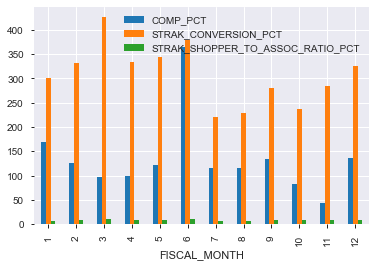

In [132]:
s1.plot(kind='bar')

In [133]:
st_df.head(4)

,DIV_x,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,...,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,DIV_y,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,...,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,...,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,...,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,...,0,73,5,5,60,0.136601,0.0,0.088670,15.726712,177.362361,4.433040,-0.350361,2.816667,212.834833,0.511628,0.177998,0.254438,0.745562,0.013234,144.2

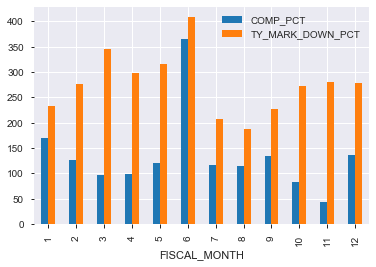

In [136]:
st_df.groupby('FISCAL_MONTH')['COMP_PCT','TY_MARK_DOWN_PCT'].agg('sum').plot(kind='bar')

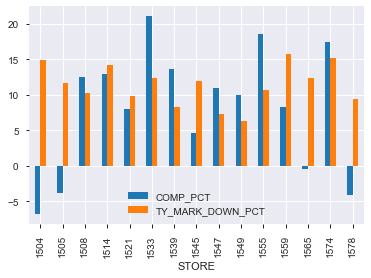

In [137]:
st_df.groupby('STORE')['COMP_PCT','TY_MARK_DOWN_PCT'].agg('sum').head(15).plot(kind='bar')

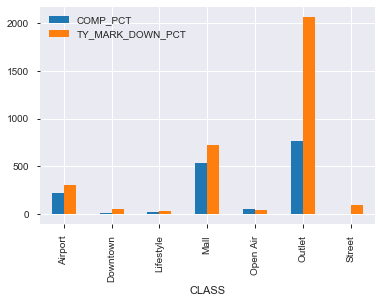

In [138]:
st_df.groupby('CLASS')['COMP_PCT','TY_MARK_DOWN_PCT'].agg('sum').head(15).plot(kind='bar')

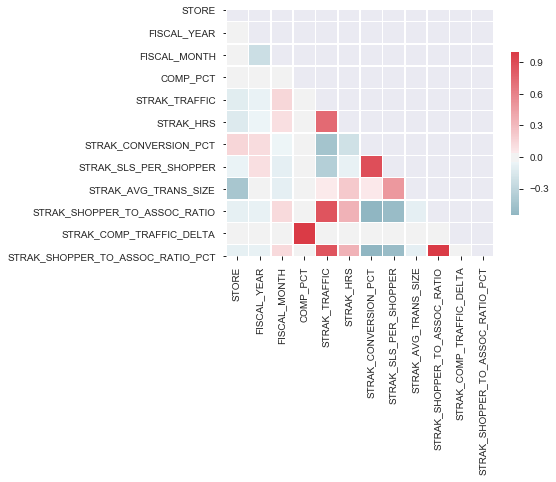

In [139]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = strak.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});